In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=torch.linspace(0.0,50.0,50).reshape(-1,1)

In [3]:
torch.manual_seed(71)
e=torch.randint(-5,5,(50,1),dtype=torch.float32)

In [4]:
y=2*x+5+e

In [5]:
import torch.nn as nn

In [6]:
nn1=nn.Linear(in_features=1,out_features=1)

In [7]:
nn1.weight.item()
nn1.bias.item()

-0.03454399108886719

In [8]:
y_pred=nn1.weight.item()*x+nn1.bias.item()

##### Initial setup

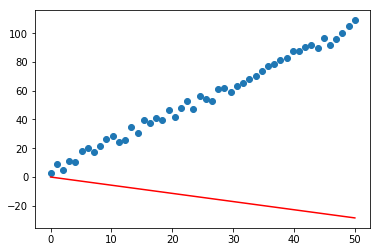

In [9]:
plt.scatter(x.numpy(),y.numpy())
plt.plot(x.numpy(),y_pred.numpy(),'r')

In [10]:
class Model(nn.Module):
    def __init__(self,in_features, out_features):
        super().__init__()
        self.in_features=in_features
        self.out_features=out_features
        self.loss=100000
        self.linear=nn.Linear(self.in_features,self.out_features)
        
    def forward(self,X):
        y_pred=self.linear(X)
        return y_pred


In [11]:
nn1=Model(1,1)

In [12]:
y_pred=nn1.forward(x)
print(y)

tensor([[  3.0000],
        [  9.0408],
        [  5.0816],
        [ 11.1224],
        [ 10.1633],
        [ 18.2041],
        [ 20.2449],
        [ 17.2857],
        [ 21.3265],
        [ 26.3673],
        [ 28.4082],
        [ 24.4490],
        [ 25.4898],
        [ 34.5306],
        [ 30.5714],
        [ 39.6122],
        [ 37.6531],
        [ 40.6939],
        [ 39.7347],
        [ 46.7755],
        [ 41.8163],
        [ 47.8571],
        [ 52.8980],
        [ 46.9388],
        [ 55.9796],
        [ 54.0204],
        [ 53.0612],
        [ 61.1020],
        [ 62.1429],
        [ 59.1837],
        [ 63.2245],
        [ 65.2653],
        [ 68.3061],
        [ 70.3469],
        [ 73.3878],
        [ 77.4286],
        [ 78.4694],
        [ 81.5102],
        [ 82.5510],
        [ 87.5918],
        [ 87.6327],
        [ 90.6735],
        [ 91.7143],
        [ 89.7551],
        [ 96.7959],
        [ 91.8367],
        [ 95.8775],
        [ 99.9184],
        [104.9592],
        [109.0000]])

In [13]:
criterion=nn.MSELoss()

In [14]:
optimizer=torch.optim.Adam(nn1.parameters(),lr=0.01)

In [15]:
epoch=5000
Loss=[]

In [16]:
for e in range(epoch):
    e=e+1
    y_pred=nn1.forward(x)
    loss=criterion(y_pred,y)
    if (e%100==0):
        print(f" for epoch {e}, the loss is {loss}")
    Loss.append(loss)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

 for epoch 100, the loss is 891.4258422851562
 for epoch 200, the loss is 164.4702911376953
 for epoch 300, the loss is 25.32422637939453
 for epoch 400, the loss is 10.00888729095459
 for epoch 500, the loss is 9.014686584472656
 for epoch 600, the loss is 8.928400039672852
 for epoch 700, the loss is 8.869996070861816
 for epoch 800, the loss is 8.808404922485352
 for epoch 900, the loss is 8.743550300598145
 for epoch 1000, the loss is 8.675955772399902
 for epoch 1100, the loss is 8.606115341186523
 for epoch 1200, the loss is 8.534523963928223
 for epoch 1300, the loss is 8.461663246154785
 for epoch 1400, the loss is 8.388014793395996
 for epoch 1500, the loss is 8.314045906066895
 for epoch 1600, the loss is 8.240209579467773
 for epoch 1700, the loss is 8.16695499420166
 for epoch 1800, the loss is 8.094709396362305
 for epoch 1900, the loss is 8.023874282836914
 for epoch 2000, the loss is 7.9548420906066895
 for epoch 2100, the loss is 7.887970924377441
 for epoch 2200, the l

In [17]:
Loss

[tensor(3168.1582, grad_fn=<MseLossBackward>),
 tensor(3134.6587, grad_fn=<MseLossBackward>),
 tensor(3101.3425, grad_fn=<MseLossBackward>),
 tensor(3068.2126, grad_fn=<MseLossBackward>),
 tensor(3035.2725, grad_fn=<MseLossBackward>),
 tensor(3002.5244, grad_fn=<MseLossBackward>),
 tensor(2969.9714, grad_fn=<MseLossBackward>),
 tensor(2937.6169, grad_fn=<MseLossBackward>),
 tensor(2905.4629, grad_fn=<MseLossBackward>),
 tensor(2873.5125, grad_fn=<MseLossBackward>),
 tensor(2841.7678, grad_fn=<MseLossBackward>),
 tensor(2810.2314, grad_fn=<MseLossBackward>),
 tensor(2778.9055, grad_fn=<MseLossBackward>),
 tensor(2747.7927, grad_fn=<MseLossBackward>),
 tensor(2716.8948, grad_fn=<MseLossBackward>),
 tensor(2686.2136, grad_fn=<MseLossBackward>),
 tensor(2655.7512, grad_fn=<MseLossBackward>),
 tensor(2625.5090, grad_fn=<MseLossBackward>),
 tensor(2595.4893, grad_fn=<MseLossBackward>),
 tensor(2565.6929, grad_fn=<MseLossBackward>),
 tensor(2536.1213, grad_fn=<MseLossBackward>),
 tensor(2506.

In [18]:
y_pred=nn1.linear.weight.item()*x+nn1.linear.bias.item()

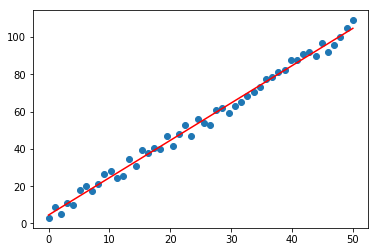

In [19]:
plt.scatter(x.numpy(),y.numpy())
plt.plot(x.numpy(),y_pred.numpy(),'r')

In [20]:
print(len(Loss))

5000


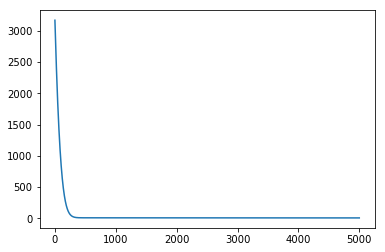

In [21]:
plt.plot(range(epoch),Loss)
plt.xLabel='epoch'
plt.yLabel='loss'
plt.show()